In [1]:
include("waveplate.jl")

    insupport(Distributions.Truncated, Real) at /usr/share/julia/site/v0.4/Distributions/src/truncate.jl:33
is ambiguous with: 
    insupport(Union{#D<:Distributions.Distribution{Distributions.Univariate, Distributions.Continuous}, Type{#D<:Distributions.Distribution{Distributions.Univariate, Distributions.Continuous}}}, Real) at /usr/share/julia/site/v0.4/Distributions/src/univariates.jl:34.
To fix, define 
    insupport(_<:Distributions.Truncated{D<:Distributions.Distribution{Distributions.Univariate, S<:Distributions.ValueSupport}, Distributions.Continuous}, Real)
before the new definition.
    insupport(Distributions.Truncated, Real) at /usr/share/julia/site/v0.4/Distributions/src/truncate.jl:33
is ambiguous with: 
    insupport(Union{#D<:Distributions.Distribution{Distributions.Univariate, Distributions.Discrete}, Type{#D<:Distributions.Distribution{Distributions.Univariate, Distributions.Discrete}}}, Real) at /usr/share/julia/site/v0.4/Distributions/src/univariates.jl:35.
To fix,

plotFileFit (generic function with 3 methods)

In [2]:
names_589 = ["589_3/589_0", "589_3/589_4_86", "589_3/589_4_108", "589_3/589_4_130",
             "589_3/589_4_154"];
infos_589 = Tuple[getFileInfo(name) for name in names_589]

5-element Array{Tuple,1}:
 ("589_3/589_0.txt",Any[589.0,0.0])          
 ("589_3/589_4_86.txt",Any[589.0,4.0,86.0])  
 ("589_3/589_4_108.txt",Any[589.0,4.0,108.0])
 ("589_3/589_4_130.txt",Any[589.0,4.0,130.0])
 ("589_3/589_4_154.txt",Any[589.0,4.0,154.0])

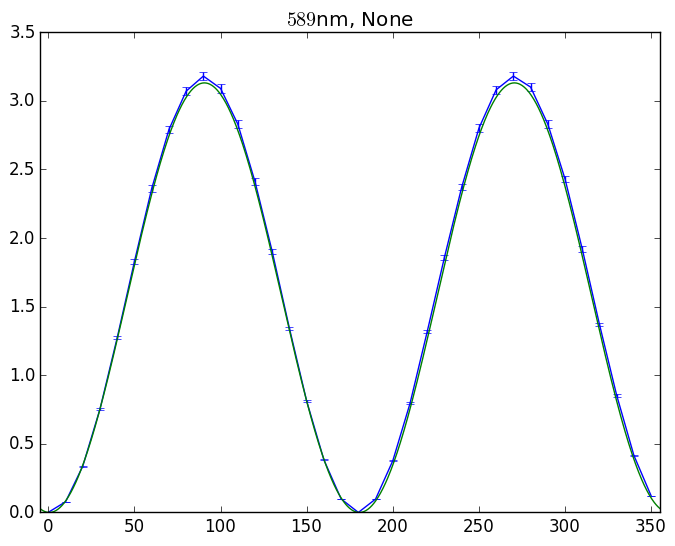

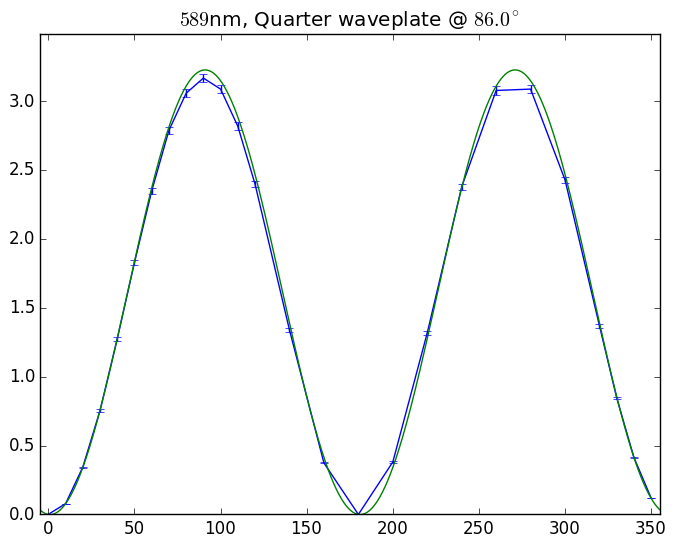

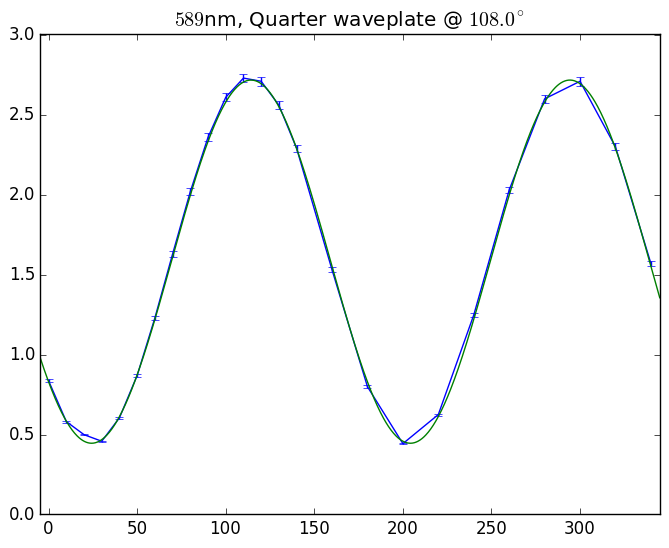

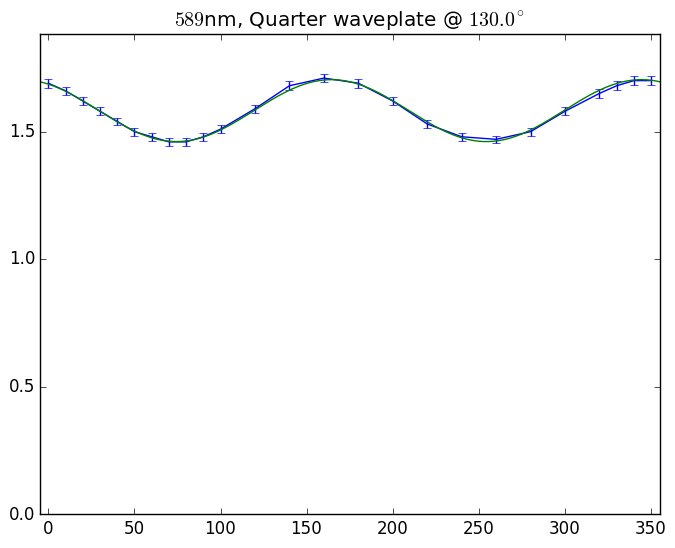

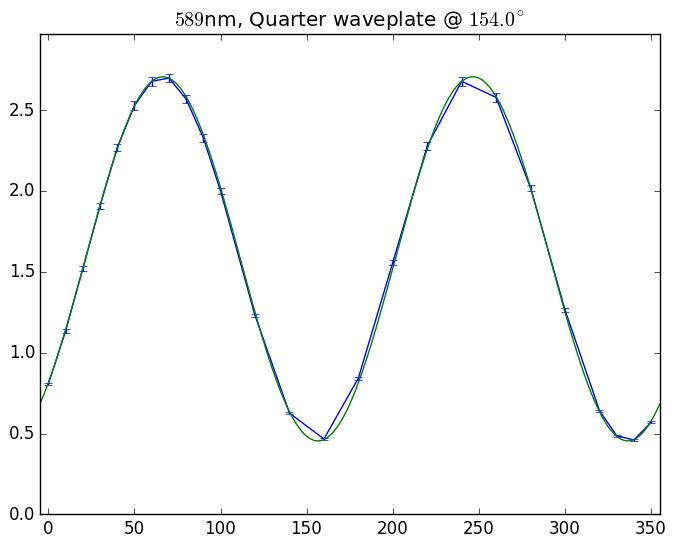

In [3]:
for finfo in infos_589
    plotFileFit(finfo, 0.01, 0.02e-3)
end

In [4]:
names_852 = ["852/852_0", "852/852_4_86", "852/852_4_108", "852/852_4_130",
             "852/852_4_154"];
infos_852 = Tuple[getFileInfo(name) for name in names_852]

5-element Array{Tuple,1}:
 ("852/852_0.txt",Any[852.0,0.0])          
 ("852/852_4_86.txt",Any[852.0,4.0,86.0])  
 ("852/852_4_108.txt",Any[852.0,4.0,108.0])
 ("852/852_4_130.txt",Any[852.0,4.0,130.0])
 ("852/852_4_154.txt",Any[852.0,4.0,154.0])

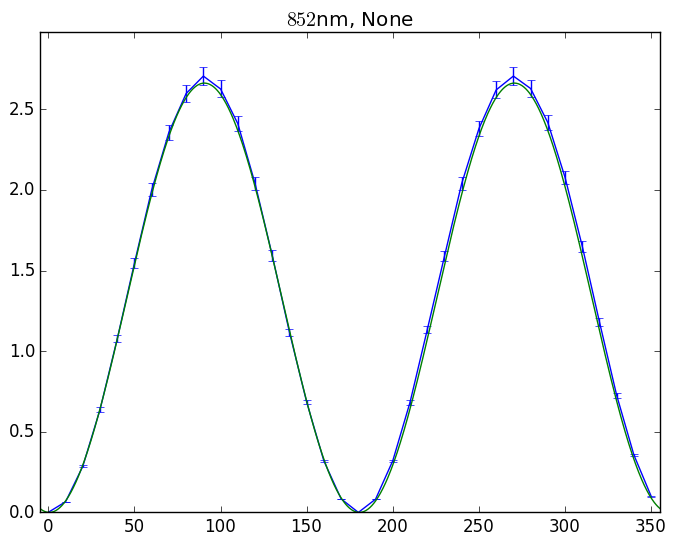

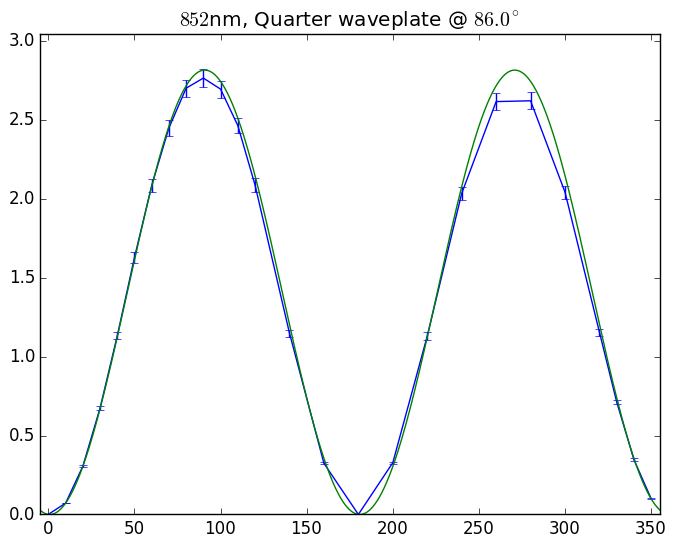

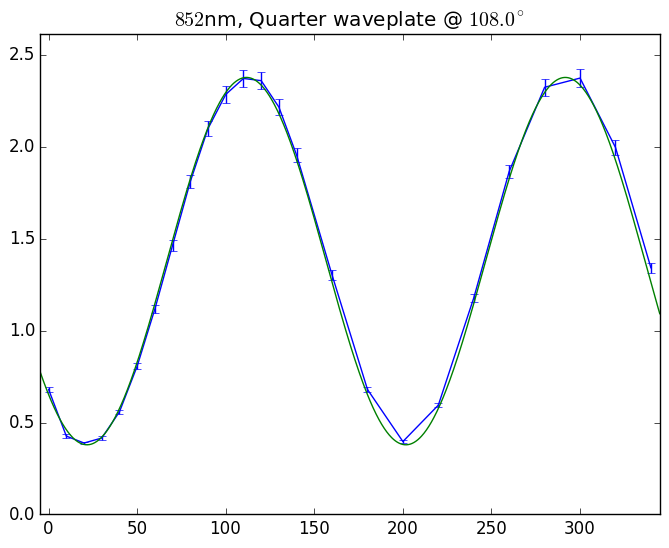

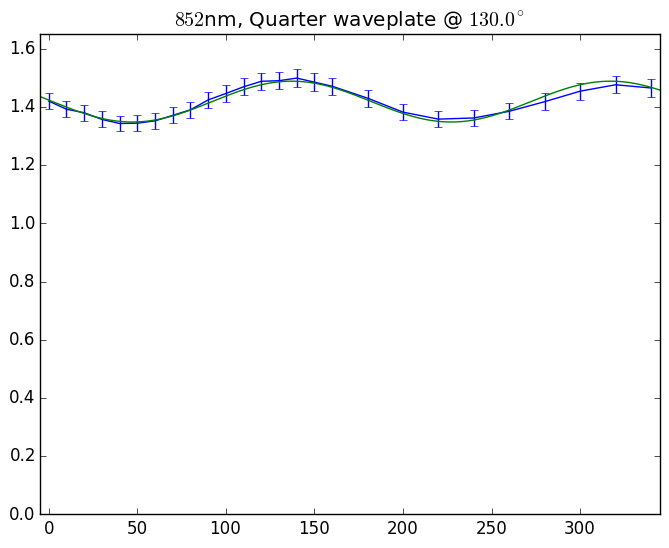

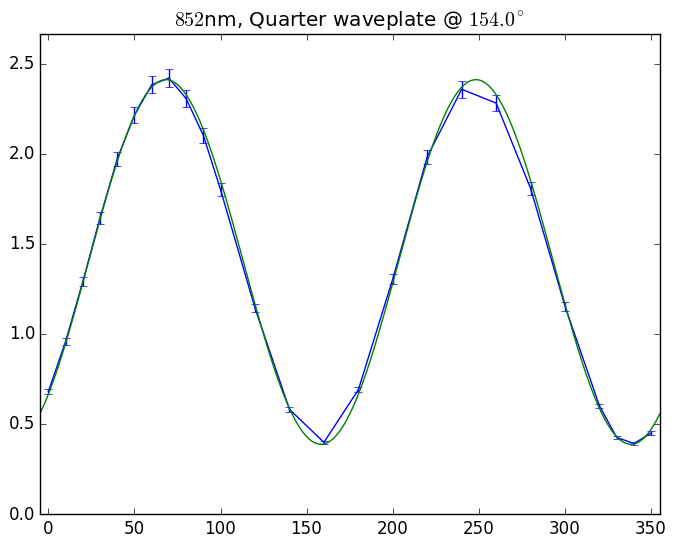

In [5]:
for finfo in infos_852
    plotFileFit(finfo, 0.02, 0.2e-3)
end

In [6]:
function pow2pol(psin, pcos)
    α = acos(pcos) / 2
    β = acos(psin / sin(2α))
    sin(α), cos(α) * exp(im * β)
end

function fit2alg(ps, errors)
    psin = ps[2] / ps[1]
    pcos = ps[3] / ps[1]
    p1 = (psin^2 + pcos^2)
    if p1 > 1
        pcos /= p1
        psin /= p1
    end
    α = acos(pcos) / 2
    β = acos(psin / sin(2α))
    (α, β)
end

fit2alg (generic function with 1 method)

In [7]:
# a -> x; b -> y
# return (psin, pcos)
function pol2pow(a, b)
    (abs(b).^2 - abs(a).^2), 2 * real(a .* conj(b))
end

# a -> x; b -> y
# return (x, y)
function wp_alg2pol(a, b, ϕ, θ)
    ϕ_2 = ϕ ./ 2
    θ2 = θ * 2
    cosθ2 = cos(θ2)
    cosϕ_2 = cos(ϕ_2)
    sinθ2 = sin(θ2)
    sinϕ_2 = sin(ϕ_2)
    (a .* cosϕ_2 + im * sinϕ_2 .* (a .* cosθ2 + b .* sinθ2),
     b .* cosϕ_2 + im * sinϕ_2 .* (a .* sinθ2 - b .* cosθ2))
end

wp_alg2pol (generic function with 1 method)

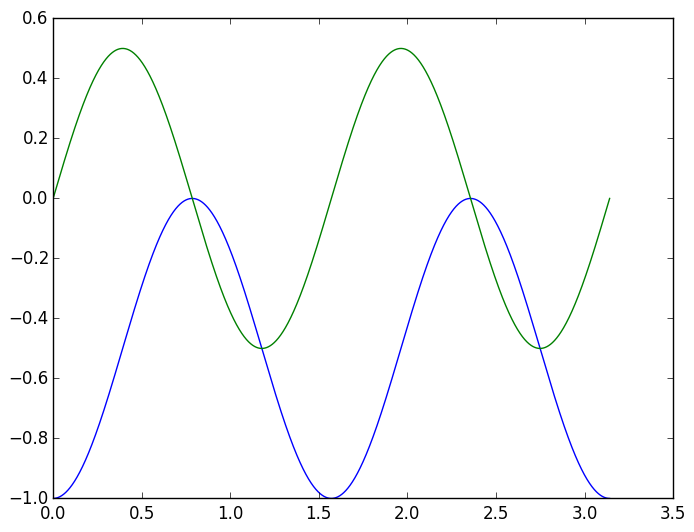

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f649269f9e8>

In [8]:
a0 = 1
b0 = 0
ϕ0 = π / 2
θ0 = linspace(0, π, 10000)

pola0, polb0 = wp_alg2pol(a0, b0, ϕ0, θ0)
powa0, powb0 = pol2pow(pola0, polb0)
plot(θ0, powa0)
plot(θ0, powb0)

In [9]:
function getDataPow(finfo)
    data = getData(finfo, 0.02, 0.2e-3)
    ps, errors = fitData(finfo, data)
    psin = ps[2] / ps[1]
    pcos = ps[3] / ps[1]
    # TODO!
    # epsin = errors[2] / ps[1]
    # epcos = errors[3] / ps[1]
    return [psin, pcos] #, (epsin, epcos)
end

getDataPow (generic function with 1 method)

In [10]:
pow_589_0 = getDataPow(infos_589[1])
pol_589_0a, pol_589_0b = pow2pol(pow_589_0...)
pow_589_4 = [(86.0, getDataPow(infos_589[2])),
             (108.0, getDataPow(infos_589[3])),
             (130.0, getDataPow(infos_589[4])),
             (154.0, getDataPow(infos_589[5]))]

4-element Array{Tuple{Float64,Array{Float64,1}},1}:
 (86.0,[-0.035656905722548725,-0.9996931092222163])
 (108.0,[-0.5381782108283611,-0.47575524948538084])
 (130.0,[-0.03987125510540185,0.06550975622904232])
 (154.0,[0.5216031250598461,-0.4849868538704832])  

In [11]:
pol_589_0a, pol_589_0b

(0.999922871180941,-0.010209573937529904 + 0.0070722195439090795im)

In [16]:
function model_589(x::Number, p)
    alg = abs(x)
    pola, polb = wp_alg2pol(pol_589_0a::Float64,
                            pol_589_0b::Complex{Float64},
                            p[1], alg - p[2])
    powa, powb = pol2pow(pola, polb)
    if x < 0
        powa
    else
        powb
    end
end

function model_589(xs, p)
    [model_589(x, p) for x in xs]
end

model_589 (generic function with 2 methods)

In [13]:
x = [-alg::Float64 for (alg, pows) in pow_589_4]
append!(x, [alg::Float64 for (alg, pows) in pow_589_4])

y = [pows[1]::Float64 for (alg, pows) in pow_589_4]
append!(y, [pows[2]::Float64 for (alg, pows) in pow_589_4])

8-element Array{Float64,1}:
 -0.0356569
 -0.538178 
 -0.0398713
  0.521603 
 -0.999693 
 -0.475755 
  0.0655098
 -0.484987 

In [17]:
fit_589 = curve_fit(model_589, x, y, [π / 2, 0.0])

LsqFit.LsqFitResult{Float64}(6,[1.5249507930855324,0.345880698789732],[-0.005813693598862114,0.4929803866510804,-0.009639175222930674,-1.2618240453129965,0.8914117776251366,0.3507468656262539,-0.20710333191570288,0.057829292872516425],8x2 Array{Float64,2}:
  0.989105    0.387839
  0.985228    0.454249
  0.980743    0.520093
  0.279254    1.68975 
 -0.0906957   1.89699 
 -0.107959    1.88213 
 -0.125074    1.86494 
 -0.437752   -0.854673)

In [23]:
fit_589.param

2-element Array{Float64,1}:
 1.52495 
 0.345881

In [24]:
pow_852_0 = getDataPow(infos_852[1])
pol_852_0a, pol_852_0b = pow2pol(pow_852_0...)
pow_852_4 = [(86.0, getDataPow(infos_852[2])),
             (108.0, getDataPow(infos_852[3])),
             (130.0, getDataPow(infos_852[4])),
             (154.0, getDataPow(infos_852[5]))]

4-element Array{Tuple{Float64,Array{Float64,1}},1}:
 (86.0,[-0.028489563723375022,-0.9997045991973734]) 
 (108.0,[-0.49785478485292206,-0.5271309652800744]) 
 (130.0,[-0.04932362702413368,0.003750384734388142])
 (154.0,[0.49659562268611634,-0.523897912738002])   

In [25]:
pol_852_0a, pol_852_0b

(0.9999099673006542,-0.010137891509428024 + 0.008790929902340198im)

In [29]:
function model_852(x::Number, p)
    alg = abs(x)
    pola, polb = wp_alg2pol(pol_852_0a::Float64,
                            pol_852_0b::Complex{Float64},
                            p[1], alg - p[2])
    powa, powb = pol2pow(pola, polb)
    if x < 0
        powa
    else
        powb
    end
end

function model_852(xs, p)
    [model_852(x, p) for x in xs]
end

model_852 (generic function with 2 methods)

In [27]:
x_852 = [-alg::Float64 for (alg, pows) in pow_852_4]
append!(x_852, [alg::Float64 for (alg, pows) in pow_852_4])

y_852 = [pows[1]::Float64 for (alg, pows) in pow_852_4]
append!(y_852, [pows[2]::Float64 for (alg, pows) in pow_852_4])

8-element Array{Float64,1}:
 -0.0284896 
 -0.497855  
 -0.0493236 
  0.496596  
 -0.999705  
 -0.527131  
  0.00375038
 -0.523898  

In [30]:
fit_852 = curve_fit(model_852, x, y, [π / 2, 0.0])

LsqFit.LsqFitResult{Float64}(6,[1.522754951505555,0.34488498614061086],[-0.004940956836659106,0.4937920324587042,-0.008887775063630587,-1.2658552580901736,0.8895538274349064,0.34888161795832634,-0.20897385688121395,0.06260920769494738],8x2 Array{Float64,2}:
  0.988755    0.394785
  0.984812    0.461104
  0.980261    0.526849
  0.277387    1.67666 
 -0.0926496   1.89793 
 -0.109898    1.88284 
 -0.126997    1.86543 
 -0.436741   -0.862889)

In [35]:
(fit_852.param - fit_589.param) / π * 180

2-element Array{Float64,1}:
 -0.125812 
 -0.0570501